In [1]:
import requests
import json

In [2]:

username = "aarushiksk" #Add your username here
url = "https://api.github.com/users/{}".format(username)
response = requests.get(url)
output= json.loads(response.text)
print(output)


{'login': 'aarushiksk', 'id': 92772439, 'node_id': 'U_kgDOBYeYVw', 'avatar_url': 'https://avatars.githubusercontent.com/u/92772439?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/aarushiksk', 'html_url': 'https://github.com/aarushiksk', 'followers_url': 'https://api.github.com/users/aarushiksk/followers', 'following_url': 'https://api.github.com/users/aarushiksk/following{/other_user}', 'gists_url': 'https://api.github.com/users/aarushiksk/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/aarushiksk/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/aarushiksk/subscriptions', 'organizations_url': 'https://api.github.com/users/aarushiksk/orgs', 'repos_url': 'https://api.github.com/users/aarushiksk/repos', 'events_url': 'https://api.github.com/users/aarushiksk/events{/privacy}', 'received_events_url': 'https://api.github.com/users/aarushiksk/received_events', 'type': 'User', 'site_admin': False, 'name': 'Aarushi', 'company': None, 'blog

# Getting the popular python libraries according to stars

In [7]:

url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
headers = {'Accept': 'application/vnd.github.v3+json'}
response = requests.get(url, headers=headers)
print(f"Status code: {response.status_code}")
#Status code 200 depicts that the request has successfully executed

Status code: 200


In [8]:
dict=response.json() #Convert the response to json

In [9]:
dict.keys() #display keys

dict_keys(['total_count', 'incomplete_results', 'items'])

In [15]:
print(f"Total Repositories: {dict['total_count']}") #Prints total repos

Total Repositories: 10419837


In [16]:
repository_dict = dict['items']
print(f"Repositories returned: {len(repository_dict)}") 

Repositories returned: 30


In [17]:
repo1=repository_dict[0]  #Get the details of the first repo

In [18]:
repo1 

{'id': 123458551,
 'node_id': 'MDEwOlJlcG9zaXRvcnkxMjM0NTg1NTE=',
 'name': 'Python-100-Days',
 'full_name': 'jackfrued/Python-100-Days',
 'private': False,
 'owner': {'login': 'jackfrued',
  'id': 7474657,
  'node_id': 'MDQ6VXNlcjc0NzQ2NTc=',
  'avatar_url': 'https://avatars.githubusercontent.com/u/7474657?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/jackfrued',
  'html_url': 'https://github.com/jackfrued',
  'followers_url': 'https://api.github.com/users/jackfrued/followers',
  'following_url': 'https://api.github.com/users/jackfrued/following{/other_user}',
  'gists_url': 'https://api.github.com/users/jackfrued/gists{/gist_id}',
  'starred_url': 'https://api.github.com/users/jackfrued/starred{/owner}{/repo}',
  'subscriptions_url': 'https://api.github.com/users/jackfrued/subscriptions',
  'organizations_url': 'https://api.github.com/users/jackfrued/orgs',
  'repos_url': 'https://api.github.com/users/jackfrued/repos',
  'events_url': 'https://api.github.com/users/

# Print two attributes of different repos

In [25]:
count=0
for repo in repository_dict:

    if(count<2):
        print(f"\nName: {repo['name']}")
        
        print(f"Owner: {repo['owner']['login']}")

        print(f"Stars: {repo['stargazers_count']}")
        print(f"Forks: {repo['forks_count']}")
        print(f"Open Issues: {repo['open_issues']}")
        print(f"Repository: {repo['html_url']}")
        print(f"Description: {repo['description']}")
    count=count+1
    


Name: Python-100-Days
Owner: jackfrued
Stars: 134335
Forks: 48814
Open Issues: 681
Repository: https://github.com/jackfrued/Python-100-Days
Description: Python - 100天从新手到大师

Name: Auto-GPT
Owner: Significant-Gravitas
Stars: 101742
Forks: 16075
Open Issues: 658
Repository: https://github.com/Significant-Gravitas/Auto-GPT
Description: An experimental open-source attempt to make GPT-4 fully autonomous.


# Convert the dictionary to a dataset

In [42]:
from IPython.display import HTML
import pandas as pd

repo_name, repo_link, stars, owner, desc, fork, Created_at = [], [], [], [], [], [],[]

# assuming you already have the 'repository_dict' list
for repo in repository_dict:
    repo_name.append(repo['name'])
    repo_url = repo['html_url']
    repo_link.append(f"<a href='{repo_url}'>{repo['name']}</a>")
    Created_at.append(repo['created_at'])
    fork.append(repo['forks_count'])
    stars.append(repo['stargazers_count'])
    owner.append(repo['owner']['login'])
    desc.append(repo['description'])

data = {
    'Repo_Name': repo_name,
    'Repo_Link': repo_link,
    'Created_at':Created_at,
    'Forks': fork,
    'Stars': stars,
    'Owner': owner,
    'Description': desc
}

df = pd.DataFrame(data)

# render the DataFrame with clickable links
display(HTML(df.to_html(render_links=True, escape=False)))

df['Created_at']= pd.to_datetime(df['Created_at'])
df


,Repo_Name,Repo_Link,Created_at,Forks,Stars,Owner,Description
0,Python-100-Days,Python-100-Days,2018-03-01T16:05:52Z,48814,134335,jackfrued,Python - 100天从新手到大师
1,Auto-GPT,Auto-GPT,2023-03-16T09:21:07Z,16075,101742,Significant-Gravitas,An experimental open-source attempt to make GPT-4 fully autonomous.
2,cpython,cpython,2017-02-10T19:23:51Z,26582,52050,python,The Python programming language
3,manim,manim,2015-03-22T18:50:58Z,5275,50801,3b1b,Animation engine for explanatory math videos
4,yt-dlp,yt-dlp,2020-10-26T04:22:55Z,3762,45667,yt-dlp,A youtube-dl fork with additional features and fixes
5,big-list-of-naughty-strings,big-list-of-naughty-strings,2015-08-08T20:57:20Z,2134,44762,minimaxir,The Big List of Naughty Strings is a list of strings which have a high probability of causing issues when used as user-input data.
6,d2l-zh,d2l-zh,2017-08-23T04:40:24Z,8977,42629,d2l-ai,《动手学深度学习》：面向中文读者、能运行、可讨论。中英文版被60多个国家的400多所大学用于教学。
7,sherlock,sherlock,2018-12-24T14:30:48Z,4821,40424,sherlock-project,🔎 Hunt down social media accounts by username across social networks
8,bert,bert,2018-10-25T22:57:34Z,9193,33980,google-research,TensorFlow code and pre-trained models for BERT
9,whisper,whisper,2022-09-16T20:02:54Z,3686,33808,openai,Robust Speech Recognition via Large-Scale Weak Supervision


,Repo_Name,Repo_Link,Created_at,Forks,Stars,Owner,Description
0,Python-100-Days,<a href='https://github.com/jackfrued/Python-1...,2018-03-01 16:05:52+00:00,48814,134335,jackfrued,Python - 100天从新手到大师
1,Auto-GPT,<a href='https://github.com/Significant-Gravit...,2023-03-16 09:21:07+00:00,16075,101742,Significant-Gravitas,An experimental open-source attempt to make GP...
2,cpython,<a href='https://github.com/python/cpython'>cp...,2017-02-10 19:23:51+00:00,26582,52050,python,The Python programming language
3,manim,<a href='https://github.com/3b1b/manim'>manim</a>,2015-03-22 18:50:58+00:00,5275,50801,3b1b,Animation engine for explanatory math videos
4,yt-dlp,<a href='https://github.com/yt-dlp/yt-dlp'>yt-...,2020-10-26 04:22:55+00:00,3762,45667,yt-dlp,A youtube-dl fork with additional features and...
5,big-list-of-naughty-strings,<a href='https://github.com/minimaxir/big-list...,2015-08-08 20:57:20+00:00,2134,44762,minimaxir,The Big List of Naughty Strings is a list of s...
6,d2l-zh,<a href='https://github.com/d2l-ai/d2l-zh'>d2l...,2017-08-23 04:40:24+00:00,8977,42629,d2l-ai,《动手学深度学习》：面向中文读者、能运行、可讨论。中英文版被60多个国家的400多所大学用于教学。
7,sherlock,<a href='https://github.com/sherlock-project/s...,2018-12-24 14:30:48+00:00,4821,40424,sherlock-project,🔎 Hunt down social media accounts by username ...
8,bert,<a href='https://github.com/google-research/be...,2018-10-25 22:57:34+00:00,9193,33980,google-research,TensorFlow code and pre-trained models for BERT
9,whisper,<a href='https://github.com/openai/whisper'>wh...,2022-09-16 20:02:54+00:00,3686,33808,openai,Robust Speech Recognition via Large-Scale Weak...


# Data Visualisation for Python Repos

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

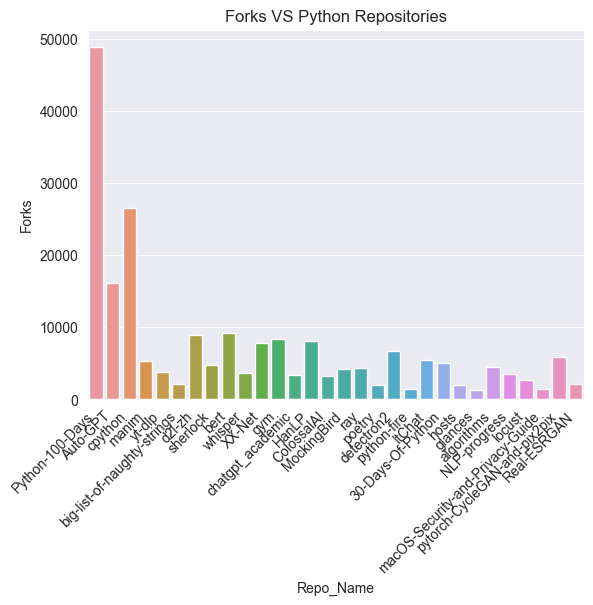

In [44]:
sns.set_style('darkgrid')
ax=sns.barplot(x='Repo_Name',y='Forks',data=df,width=0.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Forks VS Python Repositories")
plt.show()

C:\Users\aarus\AppData\Local\Temp\ipykernel_15620\4043951022.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


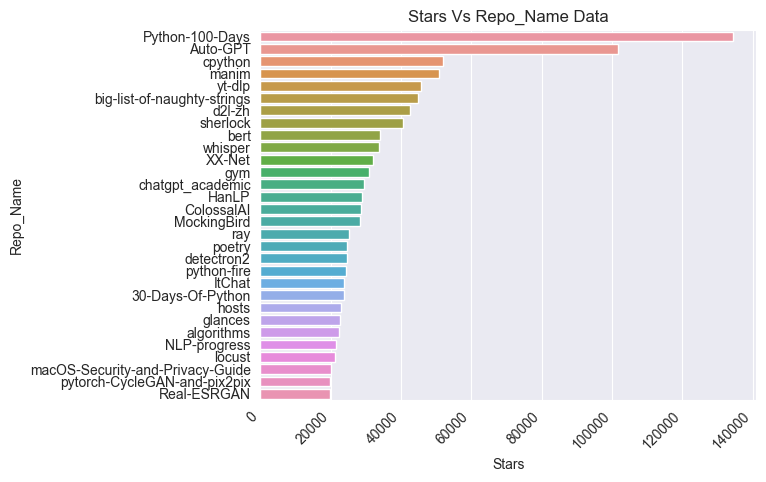

In [45]:
sns.set_style('darkgrid')
ax=sns.barplot(y='Repo_Name',x='Stars',data=df,width=0.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Stars Vs Repo_Name Data")
plt.show()


# Thank You !! 
###### <3<3<3<3<3<3 #####